# Reading and exploring GIS data using python

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import rasterio 
import seaborn as sns

In [4]:
#Read vector data using gpd

gdf_path = r"Shape_Data\local_unit.shp"
gdf = gpd.read_file(gdf_path)
gdf.head(5)

,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.51272 27.56894, 87.51255 27.56859..."
3,1,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.6885 27.70975, 87.68891 27.70938,..."
4,1,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


In [5]:
stats = {'crs': gdf.crs,
        'geom_type': gdf.geom_type,
        }
stats

{'crs': <Geographic 2D CRS: GEOGCS["NepalDD",DATUM["D_Everest_Bangladesh",SPHE ...>
 Name: NepalDD
 Axis Info [ellipsoidal]:
 - lon[east]: Longitude (Degree)
 - lat[north]: Latitude (Degree)
 Area of Use:
 - undefined
 Datum: D_Everest_Bangladesh
 - Ellipsoid: Everest 1830 (1937 Adjustment)
 - Prime Meridian: Greenwich,
 'geom_type': 0      Polygon
 1      Polygon
 2      Polygon
 3      Polygon
 4      Polygon
         ...   
 772    Polygon
 773    Polygon
 774    Polygon
 775    Polygon
 776    Polygon
 Length: 777, dtype: object}

In [6]:
#Reading raster file using rasterio

tif_path = r"nepal_climate_data\nepal_temperature_2020.tif"
    


#opening tif using rasterio

with rasterio.open(tif_path) as src:
    raster_data0 = src.read(1)
    transform0 = src.transform

print(raster_data0)

print(transform0)

[[  6.61507674   7.20615898   7.28377628 ...   7.83106058   8.03470201
    7.59940729]
 [  6.86538697   7.162125     7.61264447 ...   7.89025778   7.62162368
    7.52621726]
 [  6.70230492   7.22112303   6.18600644 ...   6.67656937   8.13867071
    7.92414332]
 ...
 [-20.34976624 -21.15442421 -19.46585343 ... -17.52422715 -17.62649315
  -16.72806764]
 [-20.59933468 -20.64839428 -20.12074976 ... -17.61103013 -17.13044914
  -17.12624469]
 [-20.41647306 -20.55686068 -20.31023541 ... -17.36799081 -18.64170269
  -17.13741812]]
| 0.02, 0.00, 80.00|
| 0.00,-0.02, 30.50|
| 0.00, 0.00, 1.00|


In [7]:
#reading 2 raster data to visualize trend over time

tif_paths = [r"nepal_climate_data\nepal_precipitation_2050.tif", 
             r"nepal_climate_data\nepal_precipitation_2020.tif"]

raster_data = []
extent = []

for tif in tif_paths:
    with rasterio.open(tif) as src:
        raster = src.read(1)
        extent = [src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
        raster_data.append(raster)
        extent.append(extent)

print(raster_data)
print(extent)

[array([[39.40284744, 41.08667713, 15.84539498, ..., 23.8502312 ,
        29.32690801, 26.1980095 ],
       [51.18471448, 53.86501299, 41.89013952, ..., 52.36263661,
        53.7438009 , 48.6359376 ],
       [46.26928895, 26.62406204, 34.95596407, ..., 51.47967742,
        18.22314761, 38.33982344],
       ...,
       [62.85590984, 86.33140336, 32.84210316, ..., 24.69394511,
        60.9386274 , 57.51745182],
       [37.81050372, 27.2080164 , 71.84896233, ..., 47.54332964,
        29.22187139, 40.93402855],
       [46.591532  , 23.22670032, 58.7630868 , ..., 49.6176172 ,
        46.37932216, 76.05667601]]), array([[59.81159875, 42.728264  , 18.09058402, ..., 35.91012142,
        31.10545045, 32.83356966],
       [42.48484612, 43.53160399, 34.99285155, ..., 53.22098097,
        45.15858228, 38.445383  ],
       [56.67051577, 50.17869726, 43.34609722, ..., 37.44451136,
        31.96422717, 27.23354908],
       ...,
       [66.7655354 , 70.07869742, 37.09305271, ..., 49.35968792,
        

# Data preparation before visualization

In [8]:
temp_files = [
    r'nepal_climate_data\nepal_temperature_2020.tif',
    r'nepal_climate_data\nepal_temperature_2050.tif']

precpt_files = [
    r'nepal_climate_data\nepal_precipitation_2020.tif',
    r'nepal_climate_data\nepal_precipitation_2050.tif']

year = [2020, 2050]


# Data visualization

C:\Users\Acer\AppData\Local\Temp\ipykernel_22644\3415118753.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


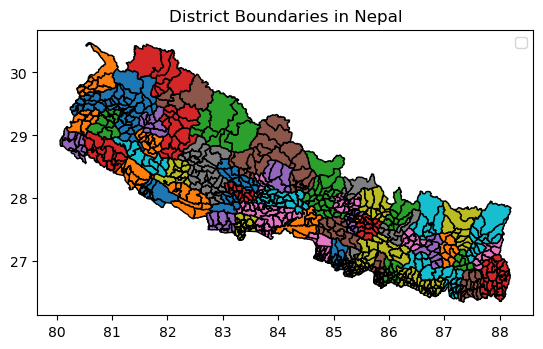

In [9]:
#visualizing vector data based on District boundaries
gdf.plot('DISTRICT', edgecolor='black', legend=False)
plt.title("District Boundaries in Nepal")
plt.legend()
plt.show()

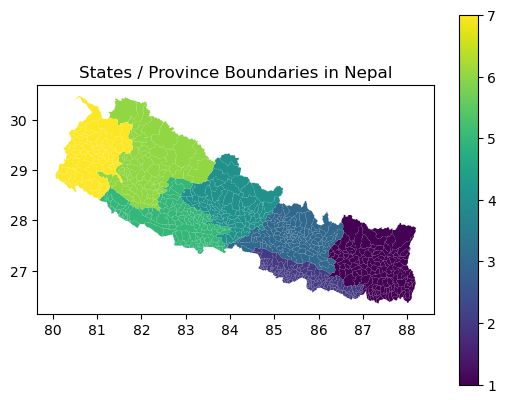

In [10]:
#visualizing vector data based on State/province boundaries
gdf.plot('STATE_CODE', legend=True)
plt.title("States / Province Boundaries in Nepal")
plt.show()

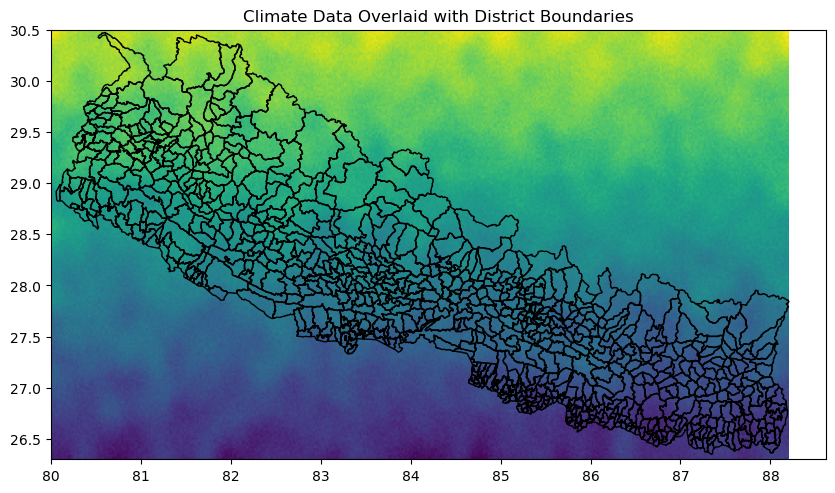

In [11]:
#Overlaying the Shapefile on the Raster


# Plot the raster and shapefile based on district
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(raster_data0, cmap='viridis',extent=[src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]] )
gdf.plot(ax=ax, column='DISTRICT' ,facecolor='none', edgecolor='black')  
plt.title('Climate Data Overlaid with District Boundaries')
plt.show()


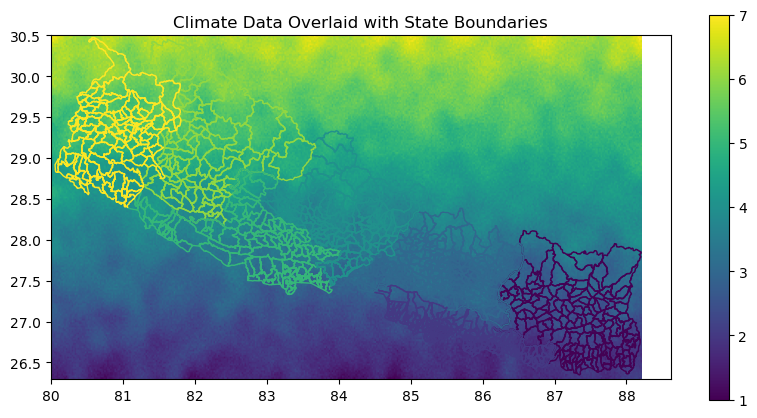

In [12]:

# Plot the raster and shapefile based on state
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(raster_data0, cmap='viridis',extent=[src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]] )
gdf.plot(ax=ax, column='STATE_CODE' ,facecolor='none', legend=True)  
plt.title('Climate Data Overlaid with State Boundaries')
plt.show()


## Map showing precipitation trends over time

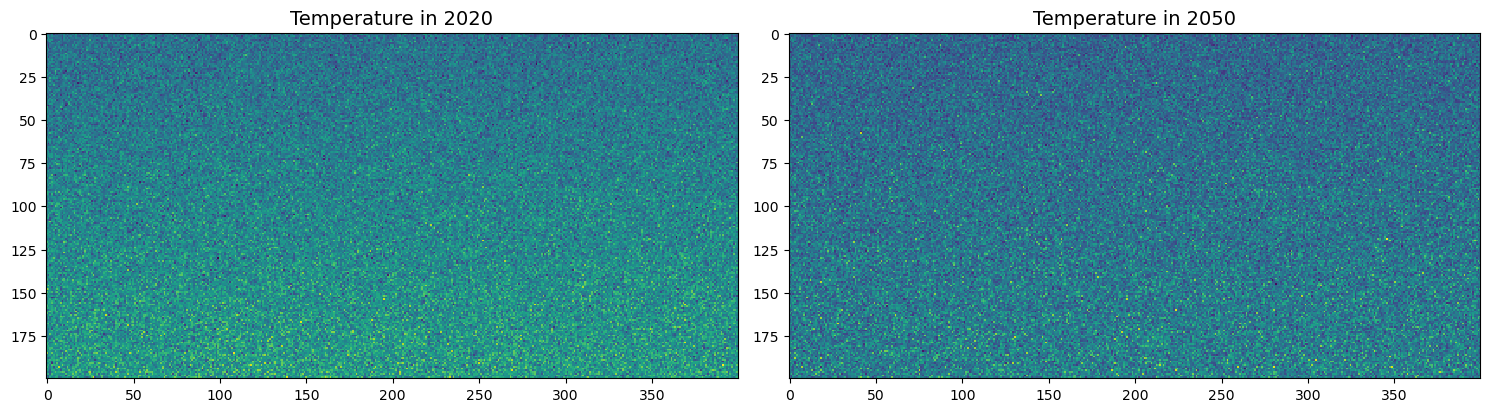

In [13]:
# A map showing precipitation trends over time


precptData_to_stat = []


fig, axes = plt.subplots(1, len(precpt_files), figsize=(15, 5))

for i, precpt_file in enumerate(precpt_files):
    with rasterio.open(precpt_file) as src:
        precpt_data = src.read(1)
        precptData_to_stat.append(precpt_data)
        
    
    ax = axes[i]
    img = ax.imshow(precpt_data, cmap='viridis', interpolation='none')
    ax.set_title(f'Temperature in {year[i]}', fontsize=14)


plt.tight_layout()

plt.show()


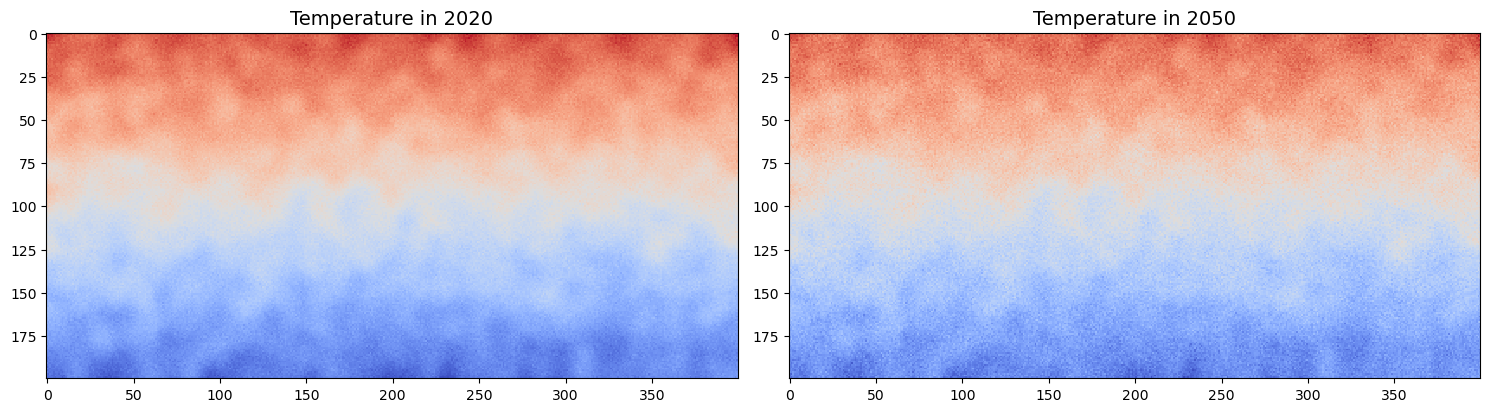

In [14]:
# A map showing temperature trends over time


tempData_to_stat = []


fig, axes = plt.subplots(1, len(temp_files), figsize=(15, 5))

for i, temp_file in enumerate(temp_files):
    with rasterio.open(temp_file) as src:
        temp_data = src.read(1)
        tempData_to_stat.append(temp_data)
    
    ax = axes[i]
    img = ax.imshow(temp_data, cmap='coolwarm', interpolation='none')
    ax.set_title(f'Temperature in {year[i]}', fontsize=14)


plt.tight_layout()

plt.show()


# Basic statistics (mean, median, min, max) of relevant climate variables.

In [15]:
#basic statistics of precipitation (2020, 2050)


precptData_to_stat

precptyear_2020 = {
    'Mean': np.mean(precptData_to_stat[0]),
    'Median': np.median(precptData_to_stat[0]), 
    'Min': np.min(precptData_to_stat[0]),  
    'Max': np.max(precptData_to_stat[0])
}

precptyear_2050 = {
    'Mean': np.mean(precptData_to_stat[1]),
    'Median': np.median(precptData_to_stat[1]), 
    'Min': np.min(precptData_to_stat[1]),  
    'Max': np.max(precptData_to_stat[1])
}
print("Statistics for Precipitation 2020")
print(precptyear_2020)
print("  ")
print("Statistics for Precipitation 2050")
print(precptyear_2050)

Statistics for Precipitation 2020
{'Mean': 50.83796524449648, 'Median': 50.36654491061009, 'Min': 6.8563433623171495, 'Max': 102.83267376645965}
  
Statistics for Precipitation 2050
{'Mean': 48.285593218473295, 'Median': 46.74243795125839, 'Min': -6.410086048906941, 'Max': 134.9692970311526}


In [16]:
#basic statistics of temperature (2020 and 2050)



tempData_to_stat

tempyear_2020 = {
    'Mean': np.mean(tempData_to_stat[0]),
    'Median': np.median(tempData_to_stat[0]), 
    'Min': np.min(tempData_to_stat[0]),  
    'Max': np.max(tempData_to_stat[0])
}

tempyear_2050 = {
    'Mean': np.mean(tempData_to_stat[1]),
    'Median': np.median(tempData_to_stat[1]), 
    'Min': np.min(tempData_to_stat[1]),  
    'Max': np.max(tempData_to_stat[1])
}
print("Statistics for temperature 2020")
print(tempyear_2020)
print("  ")
print("Statistics for temperature 2050")
print(tempyear_2050)

Statistics for temperature 2020
{'Mean': -7.577415755765925, 'Median': -7.685702505675591, 'Min': -23.198749681712457, 'Max': 8.138670708338557}
  
Statistics for temperature 2050
{'Mean': -5.472906912267607, 'Median': -5.578674327456623, 'Min': -22.08736312988644, 'Max': 11.473132313566794}


In [17]:
# Function to plot bar graph.

def plot_bar_graph(title, valueA, valueB, colorA, colorB):
    labels = ['Mean', 'Median', 'Min', 'Max']
    x = np.arange(len(labels))  # x positions for labels
    width = 0.35  # Width of bars

    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot bars for 2020 and 2050
    bars_2020 = ax.bar(x - width/2, valueA, width, label='2020', color=colorA)
    bars_2050 = ax.bar(x + width/2, valueB, width, label='2050', color=colorB)

    ax.set_xlabel('Statistic')
    ax.set_ylabel(f'{title} Value')
    ax.set_title(f'{title} Statistics for 2020 vs 2050')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

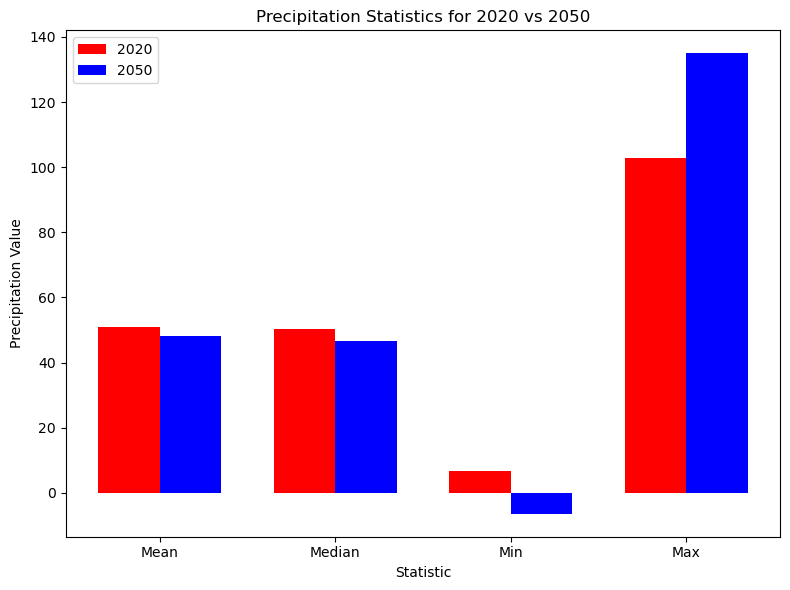

In [18]:
# Plot bar graph for Precipitation in 2020 and 2050 

year_2020_values = [precptyear_2020['Mean'], precptyear_2020['Median'], precptyear_2020['Min'], precptyear_2020['Max']]
year_2050_values = [precptyear_2050['Mean'], precptyear_2050['Median'], precptyear_2050['Min'], precptyear_2050['Max']]

plot_bar_graph(title= 'Precipitation', valueA =  year_2020_values, valueB = year_2050_values, colorA= 'r', colorB='b')


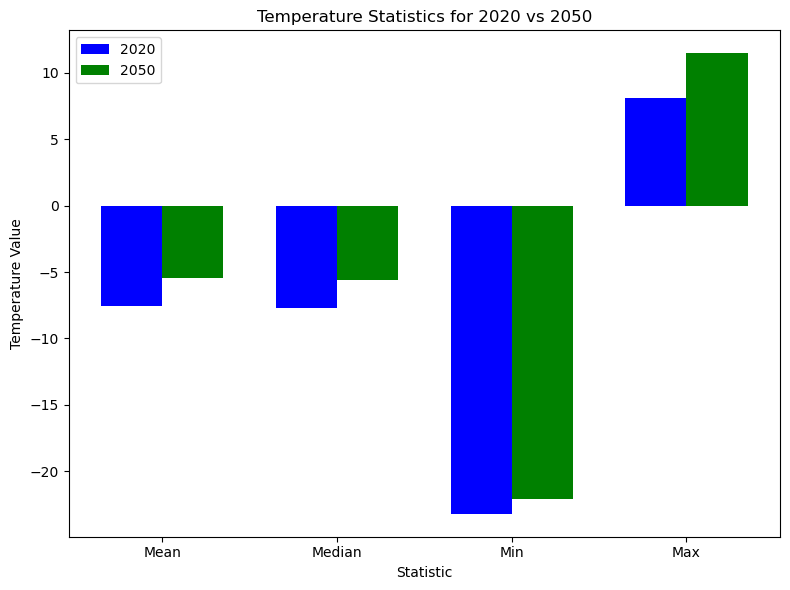

In [19]:
# Plot bar graph for temperature in 2020 and 2050 

year_2020_values = [tempyear_2020['Mean'], tempyear_2020['Median'], tempyear_2020['Min'], tempyear_2020['Max']]
year_2050_values = [tempyear_2050['Mean'], tempyear_2050['Median'], tempyear_2050['Min'], tempyear_2050['Max']]

plot_bar_graph(title= 'Temperature', valueA =  year_2020_values, valueB = year_2050_values, colorA= 'b', colorB='g')


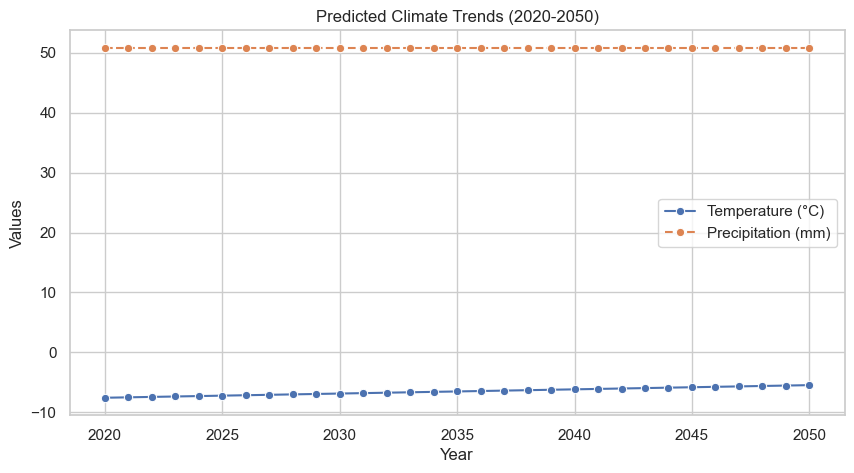

In [20]:
# Line graph


# Given data for 2020 and 2050
years = [2020, 2050]
temperature_means = [tempyear_2020['Mean'], tempyear_2050['Mean'] ]
precipitation_means =  [precptyear_2020['Mean'], precptyear_2020['Mean'] ]

# DataFrame with interpolated values
interpolated_years = np.arange(2020, 2051)  # Years from 2020 to 2050
temperature_interp = np.interp(interpolated_years, years, temperature_means)
precipitation_interp = np.interp(interpolated_years, years, precipitation_means)

df = pd.DataFrame({
    "Year": interpolated_years,
    "Temperature (°C)": temperature_interp,
    "Precipitation (mm)": precipitation_interp
})

# Set Seaborn style
sns.set(style="whitegrid")

# Create the visualization
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="Year", y="Temperature (°C)", marker="o", label="Temperature (°C)")
sns.lineplot(data=df, x="Year", y="Precipitation (mm)", marker="o", label="Precipitation (mm)", linestyle="dashed")

# Customize plot
plt.title("Predicted Climate Trends (2020-2050)")
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend()
plt.show()


# Exploratory Data Analysis (EDA) Insights

### **Temperature Insights:**

- **Mean & Median**: 
  - The **mean temperature** in 2050 is higher than in 2020 (**-5.47°C** compared to **-7.58°C**), indicating a slight warming trend over the next 30 years.
  - The **median temperature** also shows an increase from **-7.69°C** in 2020 to **-5.58°C** in 2050, suggesting that the central tendency of the temperature data is shifting towards warmer values.

- **Min & Max**: 
  - The **minimum temperature** in 2050 (**-22.09°C**) is slightly higher than in 2020 (**-23.20°C**), which could suggest that the coldest temperatures are warming up.
  - The **maximum temperature** shows a more noticeable increase, from **8.14°C** in 2020 to **11.47°C** in 2050, suggesting an increase in extreme high temperatures, indicating a warming trend not just in the average but also in the extreme temperature values.

**Observation**: 
The temperature data shows a general warming trend for both mean and extreme values (min and max) from 2020 to 2050. This could reflect climate change effects like global warming.

---

### **Precipitation Insights:**

- **Mean & Median**:
  - The **mean precipitation** decreases slightly from **50.84 mm** in 2020 to **48.29 mm** in 2050, indicating a small decrease in the overall average precipitation over time.
  - The **median precipitation** also decreases slightly from **50.37 mm** in 2020 to **46.74 mm** in 2050, which supports the observation that precipitation is trending lower in the future.

- **Min & Max**:
  - The **minimum precipitation** in 2020 is **6.86 mm**, whereas in 2050 it drops significantly to **-6.41 mm**. This negative value could indicate that in the future, there may be more periods of no precipitation or extreme droughts.
  - The **maximum precipitation** increases from **102.83 mm** in 2020 to **134.97 mm** in 2050, suggesting that although average precipitation is decreasing, the occurrence of extreme precipitation events (e.g., heavy rainfall) may be increasing in the future.

**Observation**:
- While the average precipitation is decreasing, the maximum values show an increase. This might indicate that although overall precipitation might be slightly reduced, extreme weather events such as heavy rainfall or storms may become more frequent in the future.
- The negative value for the minimum precipitation in 2050 might signal the potential for more frequent drought conditions or zero precipitation periods.

---

### **General Insights:**

- **Warming and Precipitation Extremes**:
  - The temperature data shows an overall warming trend, with both mean and extreme temperatures (min/max) increasing.
  - Precipitation data shows a decrease in the average rainfall but an increase in extreme events, particularly the maximum rainfall values.

- **Potential Implications**:
  - **For Temperature**: If the warming trend continues, it may lead to more severe weather patterns, such as more intense heatwaves, which could have various environmental, agricultural, and health impacts.
  - **For Precipitation**: The reduction in mean precipitation could suggest that regions might experience drier conditions overall, but the increase in maximum precipitation indicates that extreme weather events (heavy rainfall or storms) might become more frequent. This could lead to floods or other disruptions.

- **Drought and Flood Risks**:
  - The change in minimum precipitation suggests possible drought risks, while the rise in maximum precipitation points to increased flood risks in certain areas. This dual threat could challenge water resource management.

---

### **Conclusion**:
This exploratory data analysis (EDA) suggests that while average temperatures and precipitation may shift slightly, the most significant changes appear to be in extreme values. The warming trend in temperature and the increase in extreme precipitation highlight the potential for more erratic and extreme weather events in the future, which could have serious consequences for ecosystems, infrastructure, and human livelihoods.
